<a href="https://colab.research.google.com/github/MariaG0205/ModeladoySimulacion/blob/main/Ejercicios_capitulo_3_(Modelado_y_Simulaci%C3%B3n).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maria Alejandra Giraldo Duque. Cod.817021**
##Ejercicios capitulo 3 del libro "Nonlinear Dynamics and Chaos With Applications to Physics, Biology, Chemistry, and Engineering".


##**3.1** 
Para cada uno de los siguientes ejercicios, dibuje todos los campos vectoriales cualitativamente diferentes que ocurren cuando r varía. Demuestre que se produce una bifurcación de nodo silla de montar en un valor crítico de r, por determinar. Finalmente, dibuje el diagrama de bifurcación de puntos fijos $x*$ versus $r$.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
from scipy.integrate import solve_ivp
from ipywidgets import interact

In [ ]:
def step_euler(y,h,f):
  next_y=y+h*f(y)
  return next_y

def euler(h,f,y_0,start_t,end_t):
  N= int((end_t-start_t)/h)
  t_list=np.linspace(start_t, end_t, N+1)

  y_list=np.zeros(N+1)
  y_list[0]=y_0
  
  for i in range(0,N):
    y_list[i+1]=step_euler(y_list[i],h,f)
  return t_list,y_list

**3.1.1** $$\dot{x}= 1+rx+x^2$$

In [ ]:
@interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec =1 + escala_r*y + y**2
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.01
  t_0=0
  t_N=0.5

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.plot(t_list,y_list)
    plt.axis([t_0,t_N,-5,5])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

  
 

interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

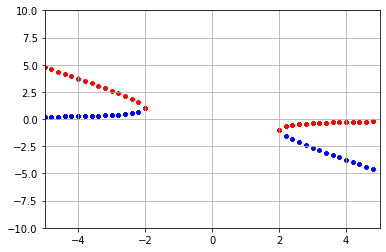

In [ ]:
def fun(t,x,r,b):
  return 1 + r*x + x**2
#azul= puntos estables 
#rojo= puntos inestables
r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')

plt.axis([-5,5,-10,10])
plt.grid()

**3.1.2** $$\dot{x}=r- cosh(x)$$

In [ ]:
@interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec =escala_r - np.cosh(y)
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.plot(t_list,y_list)
    plt.axis([t_0,t_N,-5,5])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')



interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  


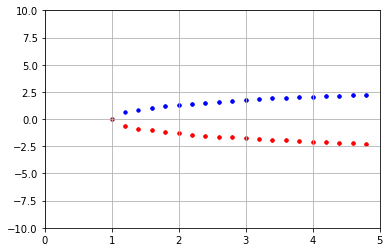

In [ ]:
def fun(t,x,r,b):
  return r - np.cosh(x)
#azul= puntos estables 
#rojo= puntos inestables
r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-1,1,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-1,1,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')

plt.axis([0,5,-10,10])
plt.grid()

**3.1.3** $$\dot{x}= r+x-ln(1-x)$$

In [ ]:
@interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec =escala_r + y - np.log(1-y)
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.plot(t_list,y_list)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([t_0,t_N,-3,3])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')



interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


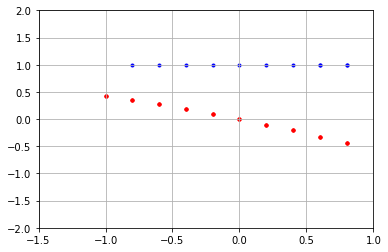

In [ ]:
def fun(t,x,r,b):
  return r + x - np.log(1-x)
#azul= puntos estables 
#rojo= puntos inestables
r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-1,1,0.2):
  for x0 in np.arange(-1,1,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-1,1,0.2):
  for x0 in np.arange(-1,1,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')

plt.axis([-1.5,1,-2,2])
plt.grid()

**3.1.4** $$\dot{x}= r +\frac{1}{2}x - \frac{x}{(1+x)}$$

In [ ]:
@interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec =escala_r + (1/2)*y- y/(1+y)
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.plot(t_list,y_list)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([t_0,t_N,-3,3])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

  


interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/common.py:111: RuntimeWarning: invalid value encountered in multiply
  y1 = y0 + h0 * direction * f0
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


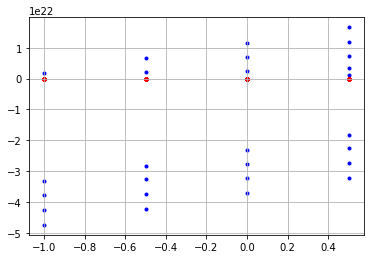

In [ ]:
def fun(t,x,r,b):
  return r + (1/2)*x- x/(1+x)

r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-1,1,0.5):
  for x0 in np.arange(-5,5,1):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-1,1,0.5):
  for x0 in np.arange(-5,5,1):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
#plt.axis([-2,2,-2.5,5])
plt.grid()

##**3.1.5**
(Bifurcaciones inusuales) Al analizar la forma normal de la bifurcación del nodo silla de montar, mencionamos la suposición de que $a=\partial f /\partial r |_{(x*,rc)}=0$. Para ver qué puede pasar si $a=\partial f /\partial r |_{(x*,rc)}\neq0$. dibuje los campos vectoriales para los siguientes ejemplos y luego trace los puntos fijos en función de r.

**a)** $\dot{x}= r^2 - x^2$



In [ ]:
 @interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec =escala_r**2 -  y**2
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.plot(t_list,y_list)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([t_0,t_N,-3,3])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')


interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

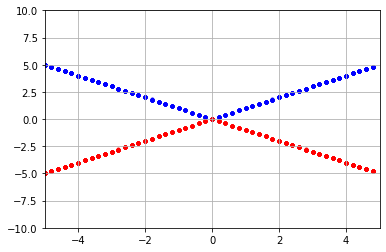

In [ ]:
def fun(t,x,r,b):
  return  r**2 -  x**2

r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-5,5,-10,10])
plt.grid()

**b)** $\dot{x}= r^2 + x^2$

In [ ]:
 @interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec =escala_r**2 + y**2
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.plot(t_list,y_list)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([t_0,t_N,-3,3])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')



interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

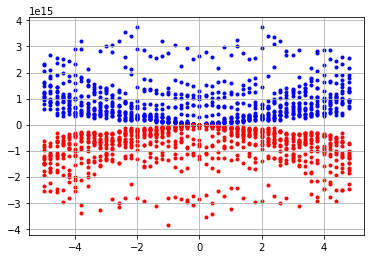

In [ ]:
def fun(t,x,r,b):
  return  r**2 +  x**2

r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
#plt.axis([-0.05,0.05,-0.05,0.05])
plt.grid()

##**3.2**
Para cada uno de los siguientes ejercicios, dibuje todos los campos vectoriales cualitativamente diferentes que ocurren cuando r varía. Demuestre que se produce una bifurcación transcrítica en un valor crítico de r, por determinar. Finalmente, dibuje el diagrama de bifurcación de puntos fijos x * vs. r.


**3.2.1** $$\dot{x}=rx+x^2$$

In [ ]:
 @interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec =escala_r*y + y**2
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.plot(t_list,y_list)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([t_0,t_N,-3,3])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

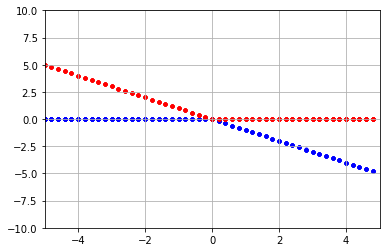

In [ ]:
def fun(t,x,r,b):
  return  r*x +  x**2

r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-5,5,-10,10])
plt.grid()

**3.2.2** $$\dot{x}=rx-ln(1+x)$$

In [ ]:
 @interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec =escala_r*y - np.log(1+y)
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.plot(t_list,y_list)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([t_0,t_N,-3,3])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/common.py:111: RuntimeWarning: invalid value encountered in multiply
  y1 = y0 + h0 * direction * f0
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


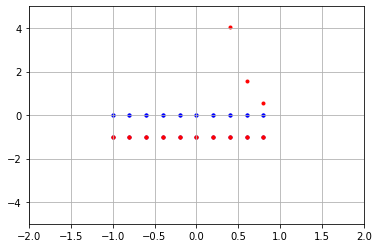

In [ ]:
def fun(t,x,r,b):
  return  r*x - np.log(1+x)

r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-1,1,0.2):
  for x0 in np.arange(-1,1,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-1,1,0.2):
  for x0 in np.arange(-1,1,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-2,2,-5,5])
plt.grid()

**3.2.3** $$\dot{x}=x-rx(1-x)$$

In [ ]:
 @interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec =y- escala_r*y*(y-1)
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.plot(t_list,y_list)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([t_0,t_N,-3,3])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

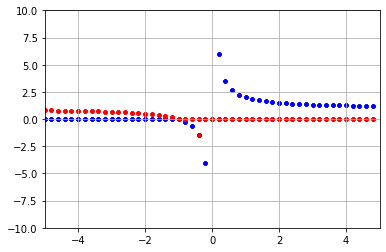

In [ ]:
def fun(t,x,r,b):
  return x- r*x *(x-1)

r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-5,5,-10,10])
plt.grid()

**3.2.4** $$\dot{x}=x(r-e^{x})$$

In [ ]:
 @interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec =y*(escala_r-np.exp(y))
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.plot(t_list,y_list)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([t_0,t_N,-3,3])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/rk.py:110: RuntimeWarning: invalid value encountered in true_divide
  return norm(self._estimate_error(K, h) / scale)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


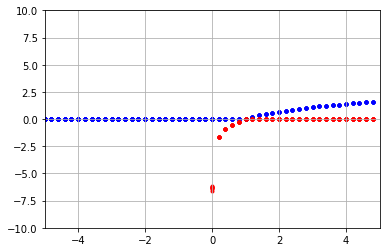

In [ ]:
def fun(t,x,r,b):
  return x*(r-np.exp(x))

r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-5,5,-10,10])
plt.grid()

##**3.4**

En los siguientes ejercicios, dibuje todos los campos vectoriales cualitativamente diferentes que ocurren cuando $r$ varía. Muestre que se produce una bifurcación en horquilla con un valor crítico de $r$ (por determinar) y clasifique la bifurcación como supercrítica o subcrítica. Finalmente, dibuje el diagrama de bifurcación de $x *$ vs. $r$.

##**3.4.1** 
$$\dot{x}=rx+4x^3$$

In [ ]:
 @interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec = escala_r*y+ 4*y**3
    return ec

  x= np.linspace(-2,2,25)
  y_0=-1
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.plot(t_list,y_list)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([t_0,t_N,-3,3])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

**RESPUESTA:**

Bifurcación de horquilla tipo subcritica.

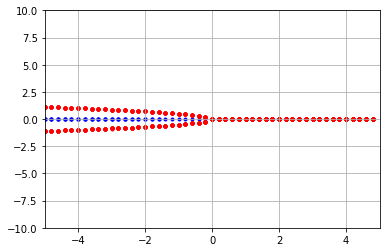

In [ ]:
 def fun(t,x,r,b):
  return r*x+4*x**3

r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-5,5,-10,10])
plt.grid()

##**3.4.2** 
$$\dot{x}=rx-senh(x)$$

In [ ]:
 @interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec = escala_r*y- np.sinh(y)
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.plot(t_list,y_list)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([t_0,t_N,-3,3])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

**RESPUESTA:**

Bifurcación de horquilla tipo supercritica.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


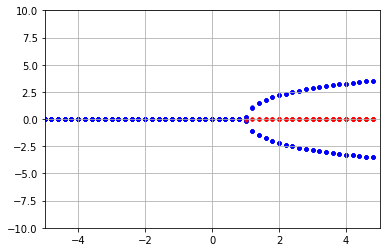

In [ ]:
 def fun(t,x,r,b):
  return r*x - np.sinh(x)

r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-5,5,-10,10])
plt.grid()

##**3.4.3** 
$$\dot{x}= rx-4x^3$$

In [ ]:
 @interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec = escala_r*y- 4*y**3
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.plot(t_list,y_list)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([t_0,t_N,-3,3])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

**RESPUESTA:**

Bifurcación de horquilla tipo supercritica.

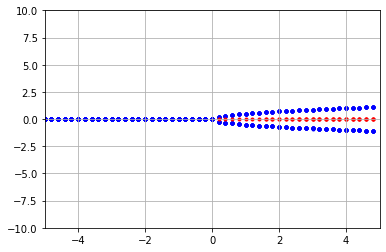

In [ ]:
 def fun(t,x,r,b):
  return r*x-4*x**3

r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-5,5,-10,10])
plt.grid()

##**3.4.4**
$$\dot{x}=x+ \frac{rx}{1+x^2}$$

In [ ]:
 @interact(escala_r=(-5, 5, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec = y + (escala_r*y)/(1+ y**2)
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.plot(t_list,y_list)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([t_0,t_N,-3,3])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

interactive(children=(FloatSlider(value=0.0, description='escala_r', max=5.0, min=-5.0), Output()), _dom_class…

**RESPUESTA:**

Bifurcación de horquilla tipo subcritico.

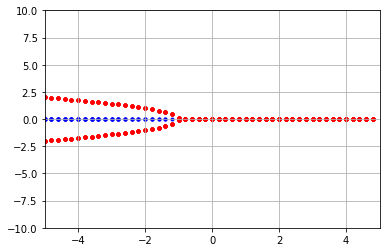

In [ ]:
 def fun(t,x,r,b):
  return x + (r*x)/(1+ x**2)

r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-5,5,-10,10])
plt.grid()

## Ejercicios 3.4.5 a 3.4.10 
Los siguientes ejercicios están diseñados para probar su capacidad para distinguir entre los distintos tipos de bifurcaciones; ¡es fácil confundirlos! En cada caso, encuentre los valores de r en los que se producen las bifurcaciones y clasifíquelos como nodo silla de montar, transcrítico, horquilla supercrítica u horquilla subcrítica. Finalmente, dibuje el diagrama de bifurcación de puntos fijos x * vs. r



##**3.4.5**

$$\dot{x}=r-3x^2$$

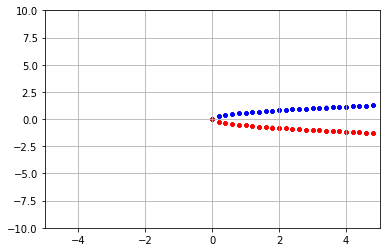

In [ ]:
 def fun(t,x,r,b):
  return r-3*x**2
  
r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-5,5,-10,10])
plt.grid()

**RESPUESTA:**

Bifurcación tipo nodo silla de montar.

##**3.4.6** 
$$\dot{x}=rx-\frac{x}{1+x}$$

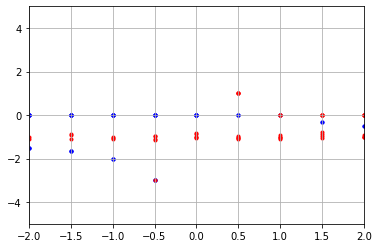

In [ ]:
 def fun(t,x,r,b):
  return r*x-((x)/(1+x))
  
r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-3,3,0.5):
  for x0 in np.arange(-3,3,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-3,3,0.5):
  for x0 in np.arange(-3,3,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-2,2,-5,5])
plt.grid()

**RESPUESTA:**

Bifurcación de horquilla tipo ????

##**3.4.7** 
$$\dot{x}=5 - re^{-x^2}$$

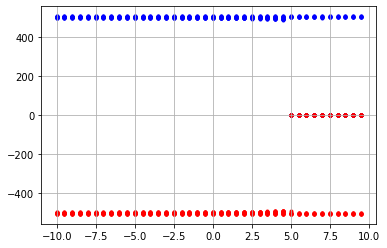

In [ ]:
 def fun(t,x,r,b):
  return 5- r*np.exp(-x**2)
  
r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-10,10,0.5):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-10,10,0.5):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
#plt.axis([-5,5,-10,10])
plt.grid()

**RESPUESTA:**

Bifurcación de horquilla tipo ????

##**3.4.8** 
$$\dot{x}=rx-\frac{x}{1+x^2}$$



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


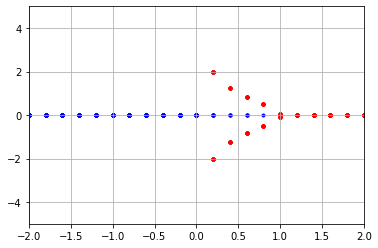

In [ ]:
 def fun(t,x,r,b):
  return r*x- ((x)/(1+x**2))
  
r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-2,2,-5,5])
plt.grid()

**RESPUESTA:**

Bifurcación de horquilla tipo subcritica

##**3.4.9** 
$$\dot{x}=x+ tanh(rx)$$


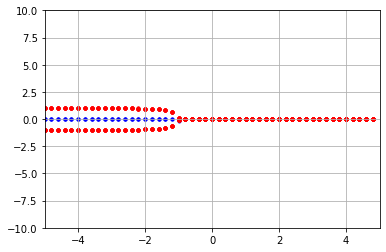

In [ ]:
 def fun(t,x,r,b):
  return x+ np.tanh(r*x)
  
r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-5,5,-10,10])
plt.grid()

**RESPUESTA:**

Bifurcación de horquilla tipo subcritico

##**3.4.10** 
$$\dot{x}=rx+ \frac{x^3}{1+x^2}$$


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


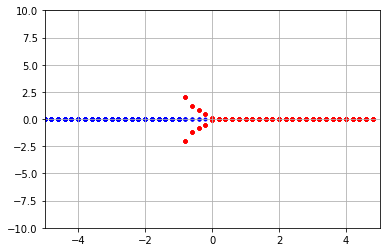

In [ ]:
 def fun(t,x,r,b):
  return x*r +((x**3)/(1+x**2))
  
r;b=-5,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-5,5,-10,10])
plt.grid()

**RESPUESTA:**

Bifurcación de horquilla tipo subcritico

##**3.4.11**

(Un diagrama de bifurcación interesante) Considere el sistema $\dot{x} = rx−sin(x)$

**a)** Para el caso $r = 0$, encuentre y clasifique todos los puntos fijos y dibuje el vector de campo.

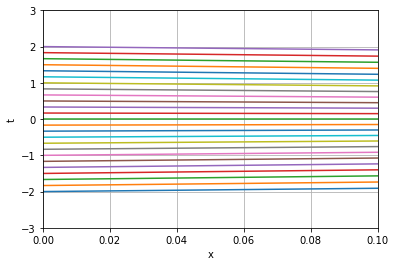

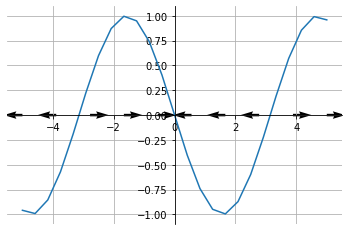

In [ ]:
r=0
def g(y):
    ec = r*y- np.sin(y)
    return ec

x= np.linspace(-2,2,25)
y_0=0
h=0.1
t_0=0
t_N=0.1

for y in x: 
  t_list, y_list= euler(h,g,y,t_0,t_N)
  plt.plot(t_list,y_list)
  plt.xlabel('x')
  plt.ylabel('t')
  plt.axis([t_0,t_N,-3,3])
  plt.grid()

x=np.linspace(-5,5,25)
X,Y=np.meshgrid(np.linspace(-5,5,10),0)
U=g(X)/abs(g(X))
V=0
fig, ax = plt.subplots()
Q= ax.quiver(X,Y,U,V,units ='width')

plt.plot(x,g(x))
plt.grid()
ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

**b)** Muestre que cuando $r= 1$, solo hay un punto fijo. ¿Qué tipo de punto fijo es ese?

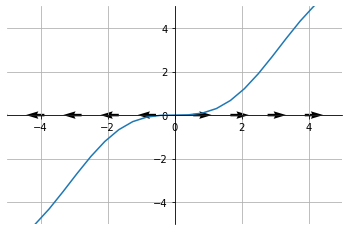

In [ ]:
r=1
def g(y):
    ec = r*y- np.sin(y)
    return ec

x=np.linspace(-5,5,25)
X,Y=np.meshgrid(np.linspace(-5,5,10),0)
U=g(X)/abs(g(X))
V=0
fig, ax = plt.subplots()
Q= ax.quiver(X,Y,U,V,units ='width')

plt.plot(x,g(x))
plt.axis([-5,5,-5,5])
plt.grid()
ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

**RESPUESTA**
Punto fijo en cero de tipo inestable.

**c)** A medida que $r$ disminuye de $\infty$ a $0$, clasifique todas las bifurcaciones que ocurran.

In [ ]:
@interact(escala_r=(0,4, 0.1))
def r(escala_r=0):
  
  def g(y):
    ec = escala_r*y- np.sin(y)
    return ec

  x= np.linspace(-2,2,25)
  y_0=0
  h=0.1
  t_0=0
  t_N=0.1

  for y in x: 
    t_list, y_list= euler(h,g,y,t_0,t_N)
    plt.plot(t_list,y_list)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([t_0,t_N,-3,3])
    plt.grid()

  x=np.linspace(-5,5,25)
  X,Y=np.meshgrid(np.linspace(-5,5,10),0)
  U=g(X)/abs(g(X))
  V=0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  plt.plot(x,g(x))
  plt.grid()
  #plt.axis([-10,10,-100,100])
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

interactive(children=(FloatSlider(value=0.0, description='escala_r', max=4.0), Output()), _dom_classes=('widge…

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sin
  


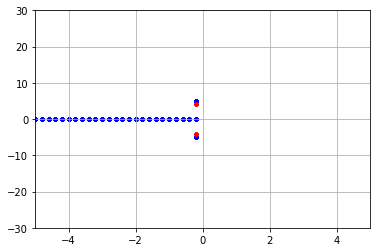

In [ ]:
 def fun(t,x,r,b):
  return r*x- np.sin(x)
r;b=1,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-10,0,0.2):
  for x0 in np.arange(-20,20,0.7):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-10,0,0.2):
  for x0 in np.arange(-20,20,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-5,5,-30,30])
plt.grid()

**d)** Para $0 < r <<  1$, encuentre una fórmula aproximada para los valores de r en los que ocurren las bifurcaciones.

0.9500000000000001


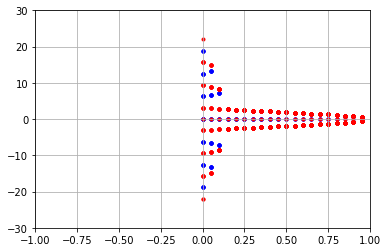

In [ ]:
def fun(t,x,r,b):
  return x*r - np.sin(x)

r;b=-1,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(0,1,0.05):
  for x0 in np.arange(-20,20,1):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(0,1,0.05):
  for x0 in np.arange(-20,20,1):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-1,1,-30,30])
plt.grid()

print (r)

**e)** Ahora clasifique todas las bifurcaciones que ocurren cuando $r$ disminuye de $0$ a $-\infty$



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sin
  


9.950000000000001


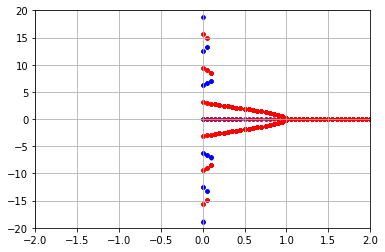

In [ ]:
def fun(t,x,r,b):
  return x*r - np.sin(x)

r;b=-1,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(0,10,0.05):
  for x0 in np.arange(-20,20,1):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(0,10,0.05):
  for x0 in np.arange(-20,20,1):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-2,2,-20,20])
plt.grid()

print (r)

**RESPUESTA** Bifurcación de horquilla tipo subcritica 

**f)** Trace el diagrama de bifurcación para  $-\infty < r < \infty$   e indique la estabilidad de diversas ramas de puntos fijos.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sin
  


9.950000000000284


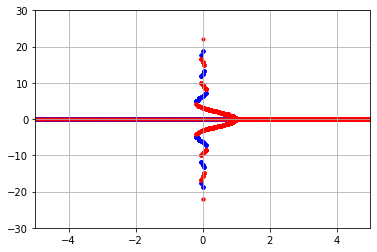

In [ ]:
def fun(t,x,r,b):
 return x*r - np.sin(x)

r;b=-1,2

ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-10,10,0.05):
  for x0 in np.arange(-20,20,1):
    sol=solve_ivp(fun,tspam, [x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='blue', marker='.')

tspam=[ti, -tf]

for r in np.arange(-10,10,0.05):
  for x0 in np.arange(-20,20,1):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')
#azul= puntos estables 
#rojo= puntos inestables
plt.axis([-5,5,-30,30])
plt.grid()

print (r)